## Выпускной проект. Оценка AB теста

### Описание проекта
Вы — новый аналитик международного интернет-магазина. Ваш предшественник запустил А/B-тест и уволился. Остались только результаты теста, техническое задание и несколько датасетов.

### Цель исследования
Необходимо проверить корректность проведенного моим предшественником A/B теста и проанализировать результаты.

### Техническое задание
- Название теста: recommender_system_test;
- Группы: А (контрольная), B (новая платёжная воронка);
- Дата запуска: 2020-12-07;
- Дата остановки набора новых пользователей: 2020-12-21;
- Дата остановки: 2021-01-04;
- Аудитория: 15% новых пользователей из региона EU;
- Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- Ожидаемое количество участников теста: 6000.
- Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
- конверсии в просмотр карточек товаров — событие product_page
- просмотры корзины — product_card
- покупки — purchase.

---

### <a id="stepend"> Оглавление</a>

- [Импорт библиотек, данных и получение первичной информации](#step1) </n>
- [Предобработка данных](#step2) </n>
- [Исследовательский анализ данных](#step3) </n>
- [Оценка результатов A/B теста](#step4) </n>
- [Общий вывод](#step5) </n>

---

### План исследования
- импортировать необходие библиотеки и методы для работы
- прочитать датасеты;
- получить первичное представление о данных;
- проверить данные соответствие типам, наличие пропущенных значений и дубликатов.

---

- привести данные к формату даты, где это необходимо;
- столбец details датасета events переименовать в purchase, так как в нем содержится информации о суммке покупки;
- пропущенные значения в столбце purchase заменить на нули.

---

- исследовать конверсию в воронке на разных этапах;
- посмотреть, обладают ли выборки одинаковые распределениями количество событий на пользователя;
- определить, есть ли в выборках одни и те же пользователи;
- построить распределение событий по дням для каждой группы.

---

- проверить статистическую разницу долей z-критерием.

---

- написать общий вывод.

### <a id='step1'>Импорт библиотек, данных и получение первичной информации</a>

In [125]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from scipy import stats as st
import math as mth
import plotly.express as px
from plotly import graph_objects as go
from warnings import simplefilter

In [126]:
# скроем предудпреждения об ошибках
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=RuntimeWarning)

In [127]:
sns.set_theme()
sns.set_style('whitegrid')

In [128]:
# импортируем датасет marketing_events
marketing_events = pd.read_csv('C:/Users/sokol/OneDrive/Рабочий стол/portfolio/yandexp/Выпускной проект/Оценка AB тестирования/ab_project_marketing_events.csv')

In [129]:
# импортируем датасет new_users
new_users = pd.read_csv('C:/Users/sokol/OneDrive/Рабочий стол/portfolio/yandexp/Выпускной проект/Оценка AB тестирования/final_ab_new_users.csv')

In [130]:
# импортируем датасет events
events = pd.read_csv('C:/Users/sokol/OneDrive/Рабочий стол/portfolio/yandexp/Выпускной проект/Оценка AB тестирования/final_ab_events.csv')

In [131]:
# импортируем датасет participants
participants = pd.read_csv('C:/Users/sokol/OneDrive/Рабочий стол/portfolio/yandexp/Выпускной проект/Оценка AB тестирования/final_ab_participants.csv')

In [132]:
# первичное представление о данных
for df in [marketing_events, new_users, events, participants]:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non

In [133]:
# проверим на пропуски
for df in [marketing_events, new_users, events, participants]:
    print(df.isna().sum())

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64
user_id       0
first_date    0
region        0
device        0
dtype: int64
user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64
user_id    0
group      0
ab_test    0
dtype: int64


In [134]:
# проверим на дубликаты
for df in [marketing_events, new_users, events, participants]:
    print(df.duplicated().sum())

0
0
0
0


In [135]:
# первые 5 строк
for df in [marketing_events, new_users, events, participants]:
    display(df.head())

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


- 377577 пропущенных значений в датасете events;
- В столбце details хранятся данные о сумме покупки, поэтому логичнее будет переименовать его в purchase;
- некоторые типы данных необходимо привести к формату даты.

### <a id='step2'>Предобработка данных</a>

In [136]:
# приведем необходимые столбцы датасете marketing_events к формату даты

# список
date_columns = ['start_dt', 'finish_dt']

for col in date_columns:
    marketing_events[col] = pd.to_datetime(marketing_events[col])

In [137]:
# столбец first_date в new_users приведем к формату даты
new_users['first_date'] = pd.to_datetime(new_users['first_date'])

In [138]:
# столбец event_dt в events приведем к формату даты
events['event_dt'] = pd.to_datetime(events['event_dt'])

In [139]:
# столбец details датасета events переименуем в purchase

# cписок
columns = ['user_id', 'event_dt', 'event_name', 'purchase']

events.set_axis(columns, axis = 'columns', inplace = True)

In [140]:
# заменим пропущенные значения в events на нули
events = events.fillna(0)

### <a id='step3'>Исследовательский анализ данных</a>

In [141]:
# проверим названия проведенных a/b тестов
participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

- У нас есть два теста, проведенных предыдущим аналитиком.

In [142]:
# посмотрим, когда было зарегистрировано последнее событие
events['event_dt'].describe()

count                  440317
unique                 267268
top       2020-12-23 02:37:24
freq                       10
first     2020-12-07 00:00:33
last      2020-12-30 23:36:33
Name: event_dt, dtype: object

In [143]:
# посмотрим, когда была совершена последняя регистрация
new_users['first_date'].describe()

count                   61733
unique                     17
top       2020-12-21 00:00:00
freq                     6290
first     2020-12-07 00:00:00
last      2020-12-23 00:00:00
Name: first_date, dtype: object

- Дата остановки A/B тестирования 4 января 2021 года, однако исходя из полученной информации, мы видим, что последние событие было совершено 30 декабря 2020 года. Получается, что у нас отсутствуют данные за 5 дней;
- В тех.задании указано, что набор новых пользователей был остановлен 21 декабря 2020 года, однако мы видим, что в данных присутствуют пользователи, зарегистрировавшиеся после прекращения набора;
- Для проведения A/B тестирования было выбрано не самое удачное время. Период проведения приходится на предновогодние праздники, что значительно искажает объективную картину данных. Во-вторых, проведение A/B теста пересекается с многочисленными маркетинговыми активностями.

In [144]:
# сделаем срез пользователей, зарегистрировавшихся после остановки регистрации
new_users = new_users.query('first_date <= "2020-12-21"')

In [145]:
# посмотрим, какие маркетинговые активности совершались в период проведения A/B теста
marketing_events.query('start_dt < "2021-01-04" and finish_dt > "2020-12-07"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


Как и ожидалось, в период проведения A/B теста были активны две маркетинговые активности: рождественское/новогоднее промо, а также новогодняя лотерея подарков. Более того, они пересекаются между собой, что вдвойне хуже.

#### Найдем пользователей, попавших в оба теста.

In [146]:
# сделаем срез по тесту recommender_system_test и посмотрим количество записей
users_system_test = participants.query('ab_test == "recommender_system_test"')
users_system_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6701 entries, 0 to 6700
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  6701 non-null   object
 1   group    6701 non-null   object
 2   ab_test  6701 non-null   object
dtypes: object(3)
memory usage: 209.4+ KB


In [147]:
# сделаем срез по тесту interface_eu_test и посмотрим количество записей
users_interface_test = participants.query('ab_test == "interface_eu_test"')
users_interface_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11567 entries, 6701 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  11567 non-null  object
 1   group    11567 non-null  object
 2   ab_test  11567 non-null  object
dtypes: object(3)
memory usage: 361.5+ KB


In [148]:
# посмотрим количество пользователей в таблице participants
len(participants['user_id'].unique())

16666

- 16666 уникальных значений, однако в рассмотренных выше таблицах 18268 записей, отсюда 1602 пересечения.

In [149]:
# объединим датасеты
intersect = users_system_test.merge(users_interface_test, on = 'user_id', how = 'left')

In [150]:
intersect.head()

,user_id,group_x,ab_test_x,group_y,ab_test_y
0,D1ABA3E2887B6A73,A,recommender_system_test,NaN,NaN
1,A7A3664BD6242119,A,recommender_system_test,NaN,NaN
2,DABC14FDDFADD29E,A,recommender_system_test,A,interface_eu_test
3,04988C5DF189632E,A,recommender_system_test,A,interface_eu_test
4,482F14783456D21B,B,recommender_system_test,NaN,NaN


In [151]:
# избавимся от пересеченных значений
participants = intersect.query('ab_test_y != "interface_eu_test"')
participants = participants[['user_id', 'group_x', 'ab_test_x']]

In [152]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 0 to 6700
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    5099 non-null   object
 1   group_x    5099 non-null   object
 2   ab_test_x  5099 non-null   object
dtypes: object(3)
memory usage: 159.3+ KB


- Осталось 5099 уникальных пользователей, принявших участие в A/B тесте. Однако до ожидаемого количества участников в 6000 человек не хватает 901 пользователя, что составляет практически 15%.

In [153]:
# соберем датасет, где каждому пользователю будет соответствовать его группа
half_columns = ['user_id', 'group']
participants = participants[['user_id', 'group_x']]
participants.set_axis(half_columns, axis = 'columns', inplace = True)
participants.head()

,user_id,group
0,D1ABA3E2887B6A73,A
1,A7A3664BD6242119,A
4,482F14783456D21B,B
5,4FF2998A348C484F,A
6,7473E0943673C09E,A


#### Проверим информацию из технического задания о том, что у нас есть 15% новых пользователей из EU.

In [154]:
# посмотрим, сколько у нас всего пользователей из EU
print(len(new_users[new_users['region'] == 'EU']['user_id'].unique()))

42340


In [155]:
# соберем данные в одни датасет
df_ext = events.merge(new_users, on = 'user_id', how = 'left')
all_data = df_ext.merge(participants, on = 'user_id')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 0 to 18803
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18804 non-null  object        
 1   event_dt    18804 non-null  datetime64[ns]
 2   event_name  18804 non-null  object        
 3   purchase    18804 non-null  float64       
 4   first_date  18804 non-null  datetime64[ns]
 5   region      18804 non-null  object        
 6   device      18804 non-null  object        
 7   group       18804 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 1.3+ MB


In [156]:
# посмотрим, сколько новых пользователей пришло из каждого региона
users_region_test = (all_data
                     .drop_duplicates('user_id')
                     .groupby('region')
                     .agg({'user_id': 'count'})
                     .reset_index()
                    )
users_region_test.columns = ['region', 'test_user_id']

In [157]:
users_region_test.head()

,region,test_user_id
0,APAC,45
1,CIS,30
2,EU,2594
3,N.America,119


In [158]:
# посмотрим, сколько всего пользователей из каждого региона
all_users = new_users['region'].value_counts().to_frame().reset_index()
all_users.columns = ['region', 'all_user_id']

In [159]:
all_users.head()

,region,all_user_id
0,EU,42340
1,N.America,8347
2,CIS,2900
3,APAC,2883


In [160]:
# объединим датасета
region = users_region_test.merge(all_users, on = 'region', how = 'left')

In [161]:
region.head()

,region,test_user_id,all_user_id
0,APAC,45,2883
1,CIS,30,2900
2,EU,2594,42340
3,N.America,119,8347


In [162]:
# посчитаем, сколько процентов составляют новые пользователи от общего количество пользователей
region['percent'] = (region['test_user_id'] / region['all_user_id'] * 100).round(1)

In [163]:
region.head()

,region,test_user_id,all_user_id,percent
0,APAC,45,2883,1.6
1,CIS,30,2900,1.0
2,EU,2594,42340,6.1
3,N.America,119,8347,1.4


- К EU принадлежат лишь 6.1% от общего количества пользователей, однако в техническом задании указано, что к EU принадлежит не менее 15% пользователей.

In [164]:
# посмотрим, сколько пользователей в группе A
len(all_data[all_data['group'] == 'A']['user_id'].unique())

2082

In [165]:
# посмотрим, сколько пользователей в группе B
len(all_data[all_data['group'] == 'B']['user_id'].unique())

706

In [166]:
# посмотрим, сколько событий каждого типа было совершено
event_frequency = (all_data
              .pivot_table(index='event_name', values = 'user_id', aggfunc='count')
              .reset_index()
              .sort_values(by='user_id', ascending=False)
              .reset_index(drop=True)
             )

In [167]:
event_frequency.head()

,event_name,user_id
0,login,8501
1,product_page,5298
2,product_cart,2522
3,purchase,2483


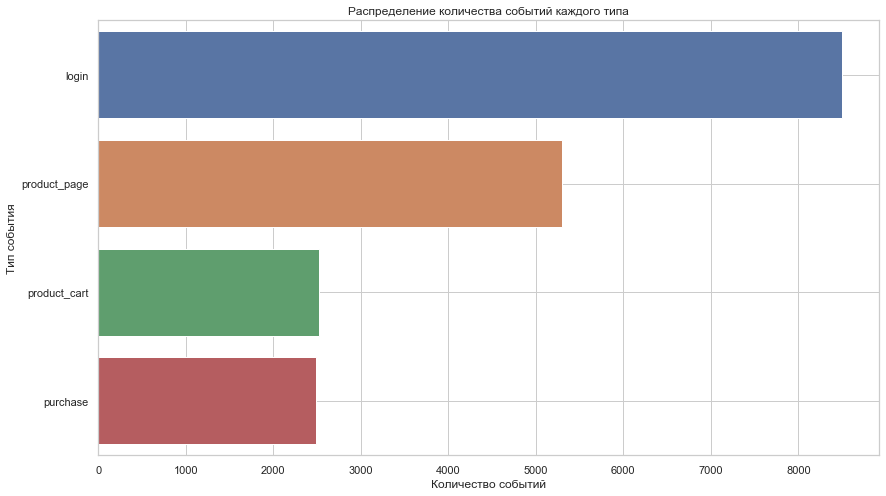

In [168]:
# нарисуем график совершения событий каждого типа
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=event_frequency, x='user_id', y='event_name')
plt.title('Распределение количества событий каждого типа')
plt.xlabel('Количество событий')
plt.ylabel('Тип события')
plt.grid(True)
plt.show();

- 8501 раз зарегистрировались;
- 5298 раз просмотрели карточку товара;
- 2522 раз товар был добавлен в корзину;
- 2483 раза была совершена покупка.

In [169]:
# посчитаем количество уникальных пользователей, совершивших события
event_users = (all_data
               .groupby('event_name').agg({'user_id': ['count','nunique']})
               .reset_index()
              )
event_users.set_axis(['event_name', 'count', 'nunique'], axis = 'columns',inplace = True)

event_users = event_users.sort_values(by='nunique', ascending=False)

In [170]:
event_users.head()

,event_name,count,nunique
0,login,8501,2788
2,product_page,5298,1757
3,purchase,2483,850
1,product_cart,2522,826


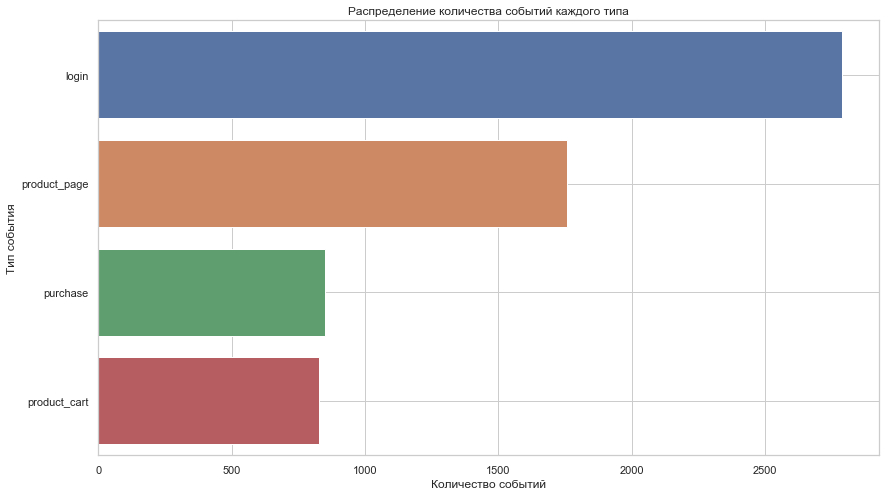

In [171]:
# нарисуем график совершения событий каждого типа уникальными пользователями
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=event_users, x='nunique', y='event_name')
plt.title('Распределение количества событий каждого типа')
plt.xlabel('Количество событий')
plt.ylabel('Тип события')
plt.grid(True)
plt.show();

- 2788 уникальных пользователей зарегистрировались;
- 1757 уникальных пользователей просмотрели карточку товара;
- 850 уникальных пользователей совершили покупку;
- 826 уникальных пользователей добавили товар в корзину.

---

В обоих случаях видно, что пользователей, совершивших покупку, больше, чем пользователей, добавивших товар в корзину. Очевидно, на сайте есть функционал оформления заказа без добавления товара в корзину.
С момента регистрации до перехода на страницу товара, и со страницы товара до совершения покупки/перехода в корзину мы теряем большое количество пользователей.

In [172]:
# определим долю пользователей, которые хоть раз совершали событие
event_users['pies'] = ((event_users['nunique'] / len(all_data['user_id']\
                                                     .unique()) * 100).round(1))\
.reset_index(drop=True)

In [173]:
event_users.head()

,event_name,count,nunique,pies
0,login,8501,2788,100.0
2,product_page,5298,1757,30.5
3,purchase,2483,850,29.6
1,product_cart,2522,826,63.0


- После регистрации 63% перешли на страницу конкретного товара. 30 % совершили оплату и 30% добавили товар в корзину. 

In [174]:
# нарисуем воронку с учетом последовательности событий
fig = go.Figure(go.Funnel(
    y = event_users['event_name'],
    x = event_users['pies'],
    textposition = 'inside',
    textinfo = 'value+percent previous',
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}))
fig.show();

- На графике еще лучше видно, что при переходе с первого на второй этап воронки мы теряем 37% пользователей, а при переходе со второго этапа на третий теряем еще 33%.

In [175]:
# сделаем таблицу-воронку для группы A

a_funnel = (all_data[all_data['group'] == 'A']
               .groupby('event_name').agg({'user_id': ['count','nunique']})
               .reset_index()
              )

a_funnel.set_axis(['event_name', 'count', 'nunique'], axis = 'columns',inplace = True)
a_funnel = (a_funnel
               .sort_values(by='nunique', ascending=False)
               .reset_index(drop=True)
              )

a_funnel['rate'] = (a_funnel['nunique'] / len(all_data[all_data['group'] == 'A']['user_id'].unique()) * 100).round(1)
a_funnel['group'] = 'A'

In [176]:
a_funnel.head()

,event_name,count,nunique,rate,group
0,login,6525,2082,100.0,A
1,product_page,4250,1360,65.3,A
2,purchase,1973,652,31.3,A
3,product_cart,1989,631,30.3,A


In [177]:
# сделаем таблицу-воронку для группы B
b_funnel = (all_data[all_data['group'] == 'B']
               .groupby('event_name').agg({'user_id': ['count','nunique']})
               .reset_index()
              )

b_funnel.set_axis(['event_name', 'count', 'nunique'], axis = 'columns',inplace = True)
b_funnel = (b_funnel
               .sort_values(by='nunique', ascending=False)
               .reset_index(drop=True)
              )

b_funnel['rate'] = (b_funnel['nunique'] / len(all_data[all_data['group'] == 'B']['user_id'].unique()) * 100).round(1)
b_funnel['group'] = 'B'

In [178]:
b_funnel.head()

,event_name,count,nunique,rate,group
0,login,1976,706,100.0,B
1,product_page,1048,397,56.2,B
2,purchase,510,198,28.0,B
3,product_cart,533,195,27.6,B


In [179]:
# объединим данные о конверсии обеих групп в один датасет
funnel = pd.concat([a_funnel, b_funnel], axis=0)

In [180]:
funnel.head()

,event_name,count,nunique,rate,group
0,login,6525,2082,100.0,A
1,product_page,4250,1360,65.3,A
2,purchase,1973,652,31.3,A
3,product_cart,1989,631,30.3,A
0,login,1976,706,100.0,B


In [181]:
# нарисуем воронки для обех групп
fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'A',
    y = a_funnel['event_name'],
    x = a_funnel['nunique'],
    textinfo = "value+percent previous",
    textposition = 'inside',
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}))
fig.add_trace(go.Funnel(
    name = 'B',
    y = b_funnel['event_name'],
    x = b_funnel['nunique'],
    textinfo = "value+percent previous",
    textposition = 'inside',
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}))
fig.update_layout(
    title="Конверсия в воронке по группам"
    )
fig.show();

- В группе A на старте 2082 уникальных пользователя, а в группе B 706 уникальных пользователей;
- В техническом задании указано, что после результатов тестирования группа B показала себя на 10% лучше группы A, однако уже на этапе перехода от регистрации к покупке, группа B на 9% хуже группы A;
- На двух следующих этапах группа B на 1-2% лучше, чем группа A, однако этого недостаточно;
- Из группы A совершили покупку 31.3% пользователей. Из группы B покупку совершили 28% пользователей.

In [182]:
# добавим в датасет all_data столбец с датой совершения события
all_data['date'] = all_data['event_dt'].dt.strftime('%Y-%m-%d')

In [183]:
all_data.head()

,user_id,event_dt,event_name,purchase,first_date,region,device,group,date
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,A,2020-12-07
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android,A,2020-12-09
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,EU,Android,A,2020-12-07
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-07,EU,Android,A,2020-12-08
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-07,EU,Android,A,2020-12-09


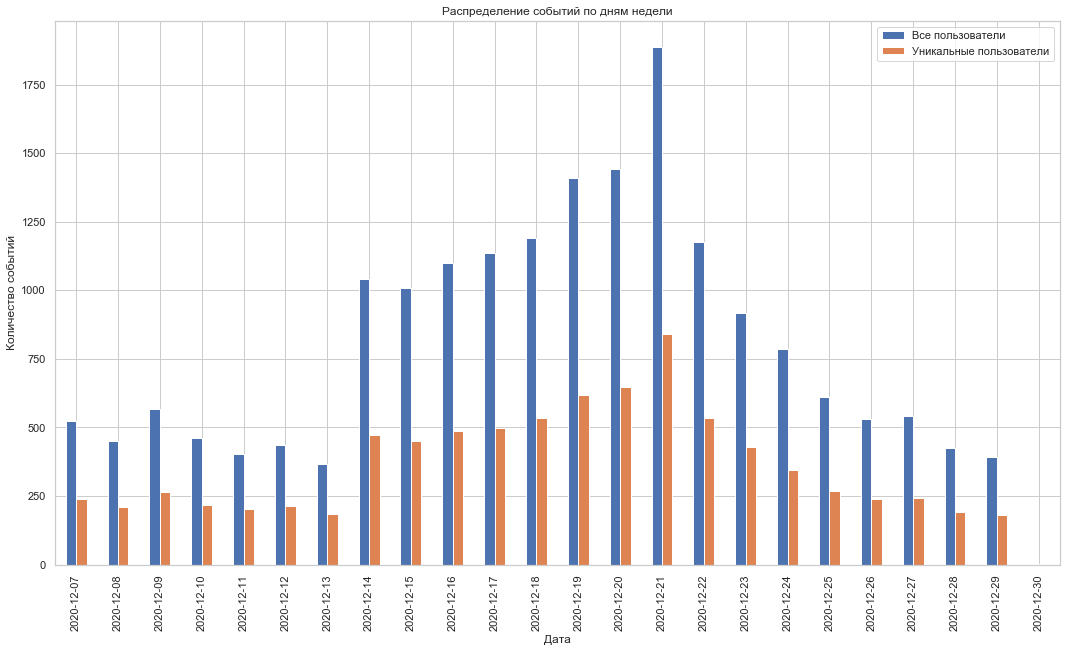

In [186]:
# нарисуем распределение событий по дням в течение всего периода проведения A/B теста
all_data.groupby('date').agg({'user_id': ['count','nunique']})\
.plot(kind='bar', figsize=(18, 10))
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение событий по дням недели')
plt.legend(['Все пользователи', 'Уникальные пользователи'])
plt.show();

#### Данны можно разбить на несколько периодов:
- 7 - 13 декабря - в этот период в среднем совершается по 500 событий каждый день;
- 14 - 21 декабря - в этот период в среднем совершается более тысячи событий каждый день, а 21 декабря также зафикисировано максимальное значение за весь период - более 1750 событий;
- 22 - 29 декабря - в этот период наблюдается общий спад активности;
- после 30 декабря ничего нет.

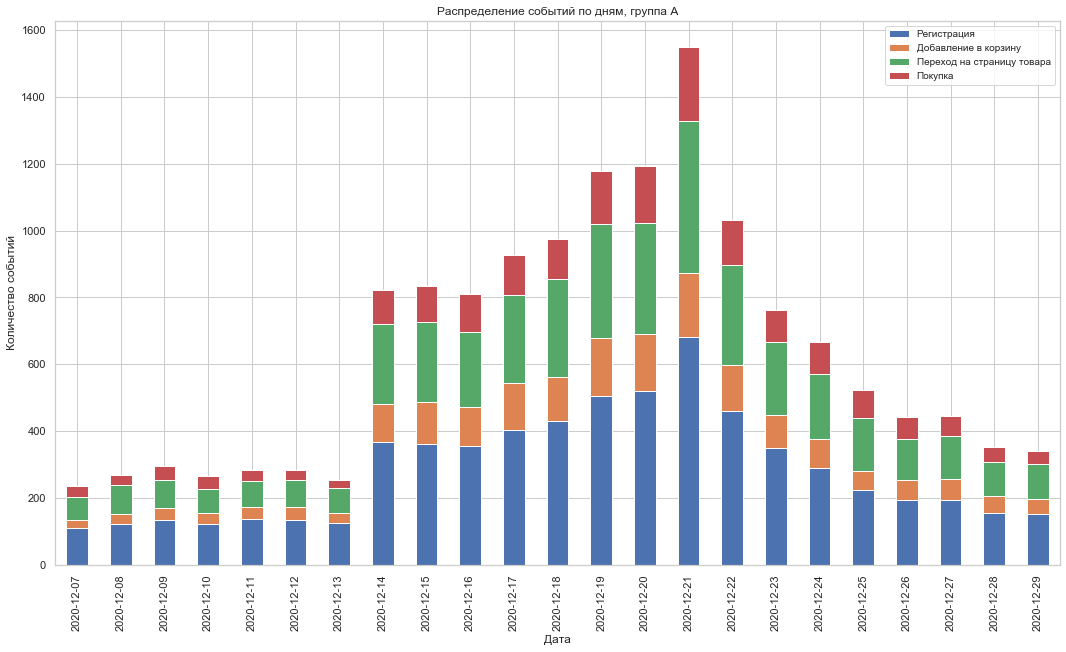

In [188]:
# нарисуем распределение событий по дням для группы A
(all_data[all_data['group'] == 'A']
    .groupby(['date','event_name'])
    .agg({'user_id': ['count']})
    .unstack().fillna(0)
    .plot(kind='bar',stacked=True, figsize=(18, 10), title = 'Распределение событий по дням, группа А')
)
plt.legend(['Регистрация', 'Добавление в корзину', 'Переход на страницу товара', 'Покупка'], prop={'size':10})
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.show();

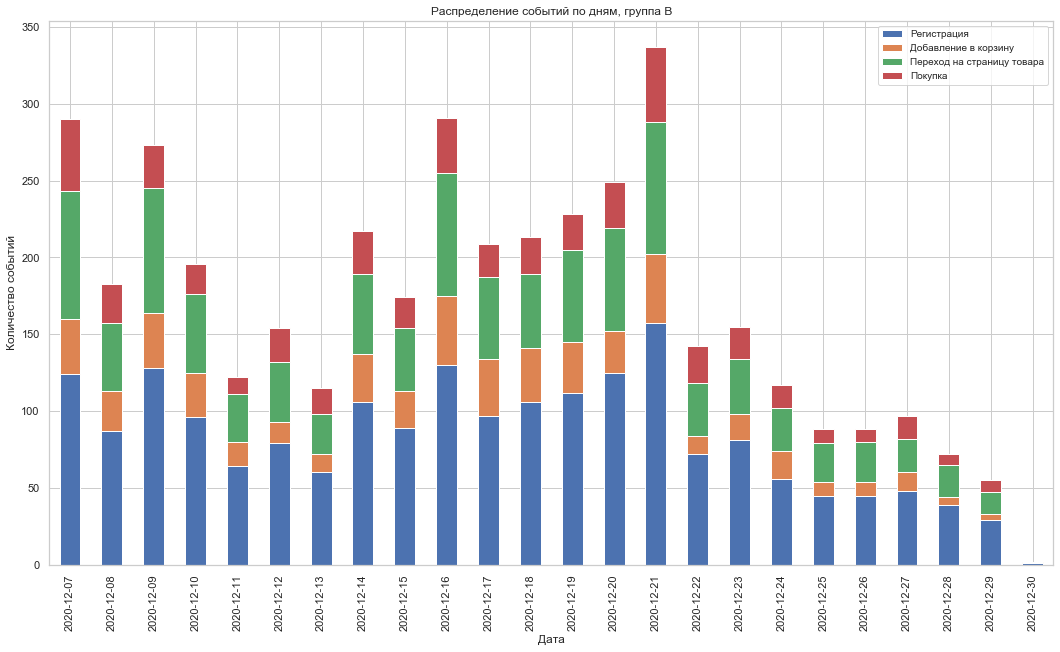

In [189]:
# нарисуем распределение событий по дням для группы B
(all_data[all_data['group'] == 'B']
    .groupby(['date','event_name'])
    .agg({'user_id': ['count']})
    .unstack().fillna(0)
    .plot(kind='bar',stacked=True, figsize=(18, 10), title = 'Распределение событий по дням, группа B')
)
plt.legend(['Регистрация', 'Добавление в корзину', 'Переход на страницу товара', 'Покупка'], prop={'size':10})
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.show();

- Исходя из графиков распределения количество событий можно сделать вывод, что в целом, пользователи в группе A совершают намного больше событий, чем пользователи в группе B;
- Также стоит отметить, что в группе B более неоднородное распределение количество событий по сравнению с группой A.

#### Вывод
- A/B тест был запущен прямо под Новый год;
- В период проведения A/B теста также было запущено две маркетинговые активности, из-за отсутствуют возможно точно установить, что повлияло на итоговую активность пользователей;
- Параллельно с A/B тестом проводил еще один A/B тест, в результе чего некоторая часть пользователей попала в два теста;
- Несмотря на то, что активность пользователей прекратилась 30 декабря 2020 года, A/B тест продолжился до 4 января 2021 года;
- Количество пользователей, необходимых для корректного проведения A/B теста ниже необходимых 6 000 тысяч или ниже 15%;
- В обоих группах мы теряем большое количество пользователей при перехода с этапа регистрации на этап перехода в карточку товара, а также с этапа перехода в карточку товара на этап добавления товара в корзину;
- Почти на всех этапах продуктовой воронки группа B демонстрирует значения хуже, чем группа A;
- За весь исследуемый период пользователи группы B демонстрируют активность хуже, чем группа A.

---

Результаты, ожидаемые от проведения A/B теста не оправдались.

### <a id='step4'>Оценка результатов A/B теста</a>

#### Гипотезы
- H0 - между долями пользователей в группах A и B нет статистически значимой разницы;
- H1 - между долями пользователей в группах A и B есть статистически значимая разница.

In [190]:
# соберем сгруппированные данные в один датасет
exp_group = all_data.pivot_table(index='event_name',
                          columns = 'group',
                          values='user_id',
                          aggfunc='nunique')

exp_group.columns = ['A', 'B']

exp_group = exp_group.sort_values(by='A', ascending=False)

In [191]:
exp_group.head()

,A,B
event_name,,
login,2082,706
product_page,1360,397
purchase,652,198
product_cart,631,195


#### Определим статистическую разницу в долях между группами A и B. В качестве события возьмем факт регистрации на сайте. 

In [192]:
alpha = .05

successes = np.array([exp_group['A'][0], exp_group['B'][0]])

trials = np.array([2082, 706]) # суммарное количество пользователей в каждой контрольной группе

p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]

p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Посчитаем статистическую разницу в долях между группами A и B для остальных событий.

In [193]:
# напишем функцию
def stat_realibility(df, column1, column2, alpha):
    
    events = df.index
    
    for i in range (1, 4):
        alpha = alpha
        
        successes = np.array(([df.loc[events[i], column1], df.loc[events[i], column2]]))
        
        trials = np.array(([df.loc[events[i-1], column1], df.loc[events[i-1], column2]]))
        
        # пропорция успехов в первой группе
        p1 = successes[0]/trials[0]
        
        # пропорция успехов во второй группе
        p2 = successes[1]/trials[1]
        
        # пропорция успехов в комбинированном датасете
        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
        
        # разница пропорций в датасетах
        difference = p1 - p2
        
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
        
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        
        print('p-значение: ', p_value)
        
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        else:
            print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
            
stat_realibility(exp_group, 'A', 'B', .05)

p-значение:  1.5371909704686715e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница
p-значение:  0.49775937615256605
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.20442739332447513
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Статистическая разница в долях между группами A и B есть только на этапе перехода на страницу товара. В остальных случаях статистически значимой разницы между долями групп A и B нет. Также стоит отметить, что статистически значимую разницу в долях между группами не удалось определить. 

### <a id='step5'>Общий вывод</a>

#### По итогам исследования и проверки гипотез можно сделать вывод, что проведенный A/B тест оказался неудачным и был проведен с несоблюдением основых принципов. Так:
- A/B тест был запущен в предновогодний период и пересекается с двумя маркетинговыми активностями;
- Отсутствуют данные за последние пять дней проведения A/B теста;
- В выборке недостаточное количество пользователей для проведения теста. Необходимо 6 000 пользователей, а у нас всего 5099;
- Неподтверждена информация о том, что 15% новых пользователей из EU. По факту, их всего 6.1%;
- Группа B на всех этапах продуктовой воронки демонстрирует худшие значения, чем группа A;
- В течение всего периода пользовательская активность у группы B значительно ниже, чем у группы B;
- Статистическая разница между долями в группах A и B присутствует только на моменте перехода на страницу товара. В остальных случаях статистическая разница отсутствует.

---

На основании перечисленных выше фактов можно сделать окончательный вывод о том, что A/B тест был произведен некорректно.